In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
data = pd.read_csv(r'C:\Users\Admin\resources\FoodPrice_in_Turkey.csv',encoding = 'ISO-8859-1')
data.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [ ]:
data.to_csv('demo_FoodPrice.csv')

In [ ]:
data.to_excel('demo_FoodPrice.xlsx')

In [ ]:
data.to_json('demo_FoodPrice.json',orient='columns')

In [ ]:
data.to_hdf('demo_FoodPrice.h5', 'table')

In [ ]:
data.to_html('demo_FoodPrice.html')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [ ]:
#Bộ dữ liệu chứa 7381 dòng dữ liệu và 8 cột
#Place, ProductName,UmName: là thuộc tính định tính, có thang đo định danh
#ProductId mặc dù có kiểu số nguyên (int64), nhưng các con số này chỉ có ý nghĩa phân biệt hàng này với hàng khác –> thuộc tính định danh
#Month,Year dữ liệu dạng số nguyên (int64) mô tả tháng, năm quan sát, những thuộc tính này chỉ dùng để định danh, phân biệt giữa tháng, năm khác nhau
#Price: thuộc tính định lượng, thang đo ratio 

In [6]:
data.shape

(7381, 8)

In [3]:
#Mô tả dữ liệu
data.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


In [ ]:
#Giá trung bình cho từng loại thực phẩm
data.groupby(['ProductId','ProductName'])['Price'].mean()

In [ ]:
#Đề xuất: giá cao nhất, thấp nhất, biến động giá

In [ ]:
#Đổi tên cột
data.rename(columns={'Place':'Địa điểm','ProductName':'Tên SP'},inplace=True)
data.head()

In [ ]:
#Thêm cột mới với tất cả các giá trị rỗng NaN
data['new_column'] = 'NaN'
data.head()

In [ ]:
# Thêm cột giảm giá 10% cho tất cả các bản ghi
# Cách 1: Gán tên cột dưới dạng một chuỗi và thêm giá trị cho cột đó

data['Giảm giá']= pd.Series('10%', index=data.index)
data.head()

In [ ]:
# Thêm cột giảm giá 12% cho tất cả các bản ghi
# Cách 2: Sử dụng phương thức insert() gồm 3 đối số
# - đối số đầu tiên là chỉ mục (vị trí) muốn chèn cột mới (chỉ mục là 10--> cột mới được thêm vào vị trí 11 của DataFrame)
# - đối số thứ hai là tên của cột mới muốn chèn 
# - đối số thứ ba giá trị của cột

data.insert(10,'Giảm giá 2',pd.Series('12%', index=data.index))
data.head()

In [ ]:
#Thêm một dòng mới
# Sử dụng phương thức append() thêm một dòng vào cuối DataFrame

data=data.append({'Địa điểm':'NA','ProductId':'RR','Tên SP':'Rice','UmId':10,'UmName':'KG','Month':6,'Year':2021,'Price':84.3785,'Giảm giá':'10%','Giảm giá 2':'12%'},ignore_index=True)
# Hiển thị 5 bản ghi cuối
data.tail()  

In [ ]:
#Xóa một cột sử dụng hàm del
del data['new_column']
data.head()

In [ ]:
# Xóa một cột sử dụng phương thức pop()
# Phương thức pop trả về cột đã xóa

data.pop('Giảm giá 2')

In [ ]:
# Xóa một cột sử dụng phương thức drop() 
# Cú pháp: df.drop('column_name', axis=1, inplace=True)
# Trong đó axis = 1 là xóa cột; inplace = True xóa trục tiếp trên dữ liệu gốc mà không phải tạo bản sao

data.drop('Giảm giá', axis=1, inplace=True)
data

In [ ]:
# Xóa nhiều cột sử dụng phương thức drop()
data.drop(['Month','Year'], axis=1, inplace=True)
data

In [ ]:
#Xóa các dòng trong DataFrame
# Cú pháp: df.drop(Chỉ số dòng cần xóa, axis=0, inplace=True)
# axis = 0 là giá trị mặc định có thể viết tường minh hoặc không
# Xóa dòng có chỉ số 1 (dòng thứ 2) sử dụng phương thức drop()

data.drop(1, axis = 0, inplace=True)
data

In [ ]:
# Xóa các dòng có chỉ số 7377 và 7379 sử dụng phương thức drop()
data.drop([7377,7379], inplace=True)
data

In [ ]:
# Truy cập dòng có chỉ số 3 của dữ liệu
tg = data.iloc[3]
tg

In [ ]:
# Truy cập các dòng có chỉ số liên tục từ 3 tới 8 của dữ liệu
tg = data.iloc[3:8]
tg

In [ ]:
# Truy cập các dòng rời rạc của dữ liệu
tg = data.iloc[[3,5,7]]
tg

In [ ]:
# Truy cập cột thứ 4 của dữ liệu
# : được sử dụng để đại diện cho tất cả các dòng.
tg = data.iloc[:,4]
tg

In [ ]:
# Truy cập các cột liên tục từ cột 3 tới cột 8 của dữ liệu
tg = data.iloc[:,3:8]
tg

In [ ]:
# Truy cập tới phần tử tại dòng 3 cột 7 của dữ liệu
tg = data.iloc[3,7]
tg

In [ ]:
# Truy cập tới các phần tử từ dòng 3 đến dòng 4, cột 5 đến cột 6 của dữ liệu
tg = data.iloc[3:5,5:7]
tg

In [ ]:
# Truy cập dòng có chỉ số 3 của dữ liệu
tg = data.loc[3]
tg

In [ ]:
# Truy cập cột thứ 4 của dữ liệu
tg = data.loc[:,'UmName']
tg

In [ ]:
# Truy cập cột thứ 4,5 của dữ liệu
tg = data.loc[:,['UmName','Month']]
tg

In [ ]:
# Truy cập tới phần tử tại dòng 3 cột 7 của dữ liệu
tg = data.loc[3,'Price']
tg

In [ ]:
# Truy cập tới phần tử có Year >=2019
tg = data.loc[data.Year >= 2019]
tg

In [ ]:
# Thay số 5 bằng số 10 trong toàn bộ dữ liệu
data.replace(5,10,inplace = True)
data.head()

In [ ]:
# Thay mã sản phẩm từ giá trị 52 thành RR trong toàn bộ dữ liệu
# RR là chuỗi ký tự nên được để trong cặp dấu nháy đơn
data.replace(52,'RR',inplace = True)
data.head()

In [ ]:
# Thay giá trị 10 trong cột Month thành giá trị 5
data['Month'].replace(10,5,inplace = True)
data.head()

In [ ]:
# Xóa các dòng có thuộc tính ProductID trùng nhau, giữ lại bản ghi cuối cùng, giữ chỉ số ban đầu của các dòng
data=data.drop_duplicates(['ProductId'], keep='last')
data

In [ ]:
# Xóa các dòng có thuộc tính ProductID trùng nhau, giữ lại bản ghi cuối cùng, thiết lập lại chỉ số
data=data.drop_duplicates(['ProductId'],keep='last').reset_index(drop=True)
data

In [ ]:
# Tách file chứa thông tin sản phẩm
data_pro = data.loc[:,['ProductId','ProductName','UmId','UmName']]
data_pro

In [ ]:
# Tách file chứa thông tin giá
data_pri = data.loc[:,['ProductId','Place','Month','Year','Price']]
data_pri

In [ ]:
# Tách file chứa thông tin giá với số dòng từ bản ghi 10 đến 20
data_pri10 = data.loc[10:20,['ProductId','Place','Month','Year','Price']]
data_pri10

In [ ]:
#Ghép các cột từ các file
data=pd.merge(data_pro,data_pri, on='ProductId')
data

In [ ]:
#Ghép các cột từ các file
data2=pd.concat([data_pro,data_pri], axis=1)
data2

In [ ]:
#Ghép các cột từ các file
data2=pd.concat([data_pro,data_pri,data_pri10], axis=1)
data2

In [ ]:
# Tách file 1 chứa 5000 bản ghi đầu tiên
df1 = data.loc[0:4999,:]
df1

In [ ]:
# Tách file 2 chứa các bản ghi còn lại
df2 = data.loc[5000:7380,:]
df2

In [ ]:
# Tách file 3 chứa thông tin giá với số dòng từ bản ghi 1000 đến 2000
df3 = data.loc[1000:2000,['ProductId','Place','Month','Year','Price']]
df3

In [ ]:
df4=pd.concat([df1,df2], axis=0)
df4

In [ ]:
df5=pd.concat([df1,df2,df3], axis=0)
df5

In [ ]:
df6=df1.append(df2)
df6

In [ ]:
df7=df1.append(df3)
df7

In [ ]:
#Kiểm tra dữ liệu khuyết thiếu
data.isna()

In [ ]:
# kiểm tra dữ liệu không bị khuyết
data.notna()

In [4]:
# xóa những dòng chứa giá trị bị khuyết
df1 = data.dropna()

In [5]:
df1.shape
#Có thể thấy, bộ dữ liệu này không bị khuyết! rất tuyệt

(7381, 8)

In [ ]:
sns.boxplot(x=df1['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [ ]:
Q1 = df1['Price'].quantile(0.25)
Q3 = df1['Price'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# xác định phần tử không phải ngoại lai
df2 = df1
df2['outlier'] = ~((df1['Price'] < (Q1 - 1.5*IQR)) | (df1['Price'] > (Q3 + 1.5*IQR)))

In [ ]:
# xóa phần tử ngoại lai
df2 = df2[df2['outlier'] == True]

In [ ]:
sns.boxplot(x=df2['Price'])  # vẽ box plot cho dữ liệu ở cột Price

In [ ]:
# mô tả dữ liệu
df2['Price'].describe()

In [ ]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df2['Price'])

In [ ]:
#chuẩn hóa dữ liệu với minmax scaling
scaler = MinMaxScaler()

# Chuẩn hóa dữ liệu trong df với Min max scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [ ]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

In [ ]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [ ]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)

In [ ]:
# chuẩn hóa dữ liệu với robust scaling
scaler = RobustScaler()

# Chuẩn hóa dữ liệu trong df với Robust Scaling ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [ ]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

In [ ]:
# vẽ lại biểu đồ hộp
sns.boxplot(x=df_s)

In [ ]:
# biểu đồ phân bố dữ liệu
sns.kdeplot(data=df_s)

In [ ]:
# chuẩn hóa dữ liệu với z-score scaling
scaler = StandardScaler()

# Chuẩn hóa dữ liệu trong df với StandardScaler ở 2 cột Price
df_s = scaler.fit_transform(df2[['Price']])

In [ ]:
# mô tả dữ liệu sau chuẩn hóa
pd.DataFrame(df_s).describe()

In [ ]:
sns.boxplot(x=df_s)

In [ ]:
sns.kdeplot(data=df_s)

In [ ]:
# các giá trị ở cột ProductName
df2['ProductName'].unique()

In [ ]:
# mã hóa cột ProductName với One-hot encoder sử dụng scikit learn
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']).reshape(-1,1))
encoded_data.todense()

In [ ]:
# mã hóa cột ProductName với One-hot encoder sử dụng pandas
pd.get_dummies(df2['ProductName'])

In [ ]:
# mã hóa cột ProductName với Label encoder sử dụng scikit learn
encoder = LabelEncoder()

encoded_data = encoder.fit_transform(np.asarray(df2['ProductName']))
encoded_data

In [ ]:
# mã hóa cột ProductName với Label encoder sử dụng pandas
df2['ProductName'].astype('category').cat.codes

In [ ]:
# Rời rạc hóa dữ liệu ở cột Price

# chia thành 5 khoảng giá trị có độ dài bằng nhau
cats = pd.cut(df2['Price'], 5)
cats

In [ ]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

In [ ]:
# chia thành 5 phần có số lượng phần tử tương đương nhau
cats = pd.qcut(df2['Price'], 5)
cats

In [ ]:
# số lượng phần từ ở mỗi phần
pd.value_counts(cats)

In [ ]:
#Vẽ biểu đồ cột so sánh giá gạo (Rice-Retail) tháng 12 năm 2019 của Ankara, Istanbul, Izmir và National Average.
#Chọn dữ liệu cần thiết cho mục tiêu
data1 = data[(data['Year'] == 2019) & (data['Month'] == 12) & (data['ProductName'] == 'Rice - Retail')]
#Vẽ biểu đồ cột
plt.bar(data1['Place'], data1['Price'])
plt.show()

In [ ]:
#Tinh chỉnh thuộc tính biểu đồ
plt.bar(data1['Place'], data1['Price'], width = 0.5)
plt.title('Rice Price in 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Place', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

Nhận xét:
Giá gạo Tháng 12/2019 của Istanbul vầ Izmir tương đương và cao hơn giá gạo trung bình quốc gia và Ankara.
Giá gạo tháng 12/2019 tại Ankara thấp nhất.

In [ ]:
#Vẽ biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail) trung bình cả nước (National Average) trong năm 2019 tại Thổ Nhĩ Kì.
#Chọn dữ liệu cần thiết cho mục tiêu
data2 = data[(data['Place'] == 'National Average') & (data['Year'] == 2019) & (data['ProductName'] == 'Rice - Retail')]
#Vẽ biểu đồ đường
plt.plot(data2['Month'], data2['Price'])
plt.show()

In [ ]:
#Tinh chỉnh thuộc tính biểu đồ
plt.plot(data2['Month'], data2['Price'], linewidth = 2, marker = '*', markersize=10, markerfacecolor='red', markeredgecolor = 'blue', markeredgewidth=2)
plt.title('Rice Price of National Average in 2019', fontsize = 16, color = 'r')
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

Nhận xét:
Giá gạo trung bình quốc gia năm 2019 tăng liên tục từ tháng 1 cho tới tháng 9, tháng 10, 11 có giảm nhẹ. Tuy nhiên, giá gạo lại tiếp tục tăng trở lại vào tháng 12/2019.
Giá gạo trung bình quốc gia nhìn chung có xu hướng tăng và dự kiến vẫn có thể tiếp tục tăng vào năm 2020.

In [ ]:
#Vẽ biểu đồ Scatter phân tích mối liên quan giữa giá gạo và giá gas trung bình quốc gia (National Average) tại Thổ Nhĩ Kì.
#Chọn dữ liệu cần thiết cho mục tiêu
x = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Fuel (gas) - Retail') & (data['Year'] == 2019)]
y = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Rice - Retail') & (data['Year'] == 2019)]
#vẽ biểu đồ
plt.scatter(x['Price'], y['Price'])
plt.show()

In [ ]:
#Tinh chỉnh biểu đồ
plt.scatter(x['Price'], y['Price'], s = 50)
plt.title('Relationship between Rice Price and Gas Price', fontsize = 16, color = 'r')
plt.xlabel('Gas', fontsize = 14)
plt.ylabel('Rice', fontsize = 14)
plt.show()

Nhận xét: đối với dữ liệu trung bình quốc gia năm 2019
Giá Gas có ảnh hưởng khá mạnh tới giá Gạo.
Giá Gạo tăng rất nhanh khi giá Gas tăng lên.
Xu hướng tăng có thể coi là tuyến tính
Trong dữ liệu có 1 điểm bất thường: giá gạo thấp nhưng giá Gas lại rất cao. Điều này xảy ra có thể do 1 sự kiện bất thường hoặc do nhập liệu.

In [ ]:
#Vẽ các biểu đồ cột so sánh giá Milk (powder, infant formula) và Fuel (gas) tháng 12 cuối năm năm 2019 của Ankara, Istanbul, Izmir và National Average
#lấy dữ liệu
d11 = data[(data['Year'] == 2019) & (data['Month'] == 12) & (data['ProductName'] == 'Milk (powder, infant formula) - Retail')].reset_index()
d12 = data[(data['Year'] == 2019) & (data['Month'] == 12) & (data['ProductName'] == 'Fuel (gas) - Retail')].reset_index()
data1 = pd.DataFrame({'x': d11['Place'], 'y1': d11['Price'], 'y2': d12['Price']})

In [ ]:
#Vẽ biểu đồ
data1.plot(x = 'x', y = ['y1', 'y2'], kind = 'bar')
plt.title('Milk and Gas Price in 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Place', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

In [ ]:
#Vẽ các biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail), giá Fuel (gas) trung bình cả nước (National Average) trong năm 2016, 2018, 2019 tại Thổ Nhĩ Kì.
#Vẽ biểu đồ Scatter phân tích mối liên quan giữa giá gạo và giá gas trung bình quốc gia (National Average) tại Thổ Nhĩ Kì các năm 2016, 2018, 2019.
#lấy dữ liệu
d21 = data[(data['Place'] == 'National Average') & (data['Year'] == 2016) & (data['ProductName'] == 'Milk (powder, infant formula) - Retail')]
d22 = data[(data['Place'] == 'National Average') & (data['Year'] == 2016) & (data['ProductName'] == 'Fuel (gas) - Retail')]
d23 = data[(data['Place'] == 'National Average') & (data['Year'] == 2018) & (data['ProductName'] == 'Milk (powder, infant formula) - Retail')]
d24 = data[(data['Place'] == 'National Average') & (data['Year'] == 2018) & (data['ProductName'] == 'Fuel (gas) - Retail')]
d25 = data[(data['Place'] == 'National Average') & (data['Year'] == 2019) & (data['ProductName'] == 'Milk (powder, infant formula) - Retail')]
d26 = data[(data['Place'] == 'National Average') & (data['Year'] == 2019) & (data['ProductName'] == 'Fuel (gas) - Retail')]

d31 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Fuel (gas) - Retail') & (data['Year'] == 2016)]
d32 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Milk (powder, infant formula) - Retail') & (data['Year'] == 2016)]
d33 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Fuel (gas) - Retail') & (data['Year'] == 2018)]
d34 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Milk (powder, infant formula) - Retail') & (data['Year'] == 2018)]
d35 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Fuel (gas) - Retail') & (data['Year'] == 2019)]
d35 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Fuel (gas) - Retail') & (data['Year'] == 2019)]
d36 = data[(data['Place'] == 'National Average') & (data['ProductName'] == 'Milk (powder, infant formula) - Retail') & (data['Year'] == 2019)]

In [ ]:
#Vẽ biểu đồ kết hợp
fig, ax = plt.subplots(3, 2)
ax[0][0].plot(d21['Month'], d21['Price'], marker = '*', label = 'Milk-2016')
ax[0][0].plot(d22['Month'], d22['Price'], marker = 's', label = 'Gas-2016')
ax[0][0].set_ylabel('Price')
ax[0][0].set_xticklabels([])
ax[0][0].set_title('2016')

ax[1][0].plot(d23['Month'], d23['Price'], marker = '*', label = 'Milk-2018')
ax[1][0].plot(d24['Month'], d24['Price'], marker = 's', label = 'Gas-2018')
ax[1][0].set_ylabel('Price')
ax[1][0].set_xticklabels([])
ax[1][0].set_title('2018')

ax[2][0].plot(d25['Month'], d25['Price'], marker = '*', label = 'Milk')
ax[2][0].plot(d26['Month'], d26['Price'], marker = 's', label = 'Gas')
ax[2][0].set_ylabel('Price')
ax[2][0].set_xlabel('Month')
ax[2][0].legend()
ax[2][0].set_title('2019')

ax[0][1].scatter(d31['Price'], d32['Price'])
ax[0][1].set_title('2016')
ax[0][1].set_ylabel('Rice')
ax[0][1].set_xticklabels([])

ax[1][1].scatter(d33['Month'], d34['Price'])
ax[1][1].set_title('2018')
ax[1][1].set_xticklabels([])

ax[2][1].scatter(d35['Month'], d36['Price'])
ax[2][1].set_title('2019')
ax[2][1].set_xlabel('Gas')
plt.show()

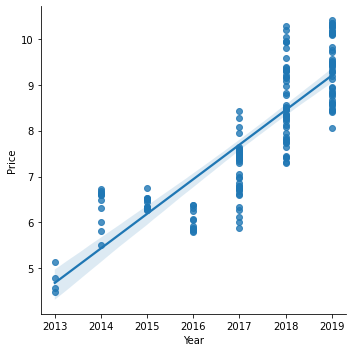

In [7]:
#Lọc dữ liệu sản phẩm gạo, vẽ biểu đồ xu hướng qua các năm
rice_df = df1[df1["ProductId"] == 52]
sns.lmplot(x="Year", y="Price",data = rice_df)

Có thể nhận thấy rằng giá gạo tăng dần qua các năm

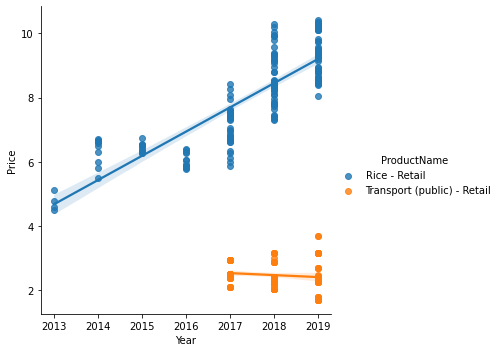

In [9]:
trans_df = df1[(df1["ProductName"] == "Transport (public) - Retail") | (df1["ProductName"] == "Rice - Retail")]
sns.lmplot(x="Year", y="Price", hue="ProductName", data = trans_df)

có thể thấy rằng dù chi phí vận chuyển có xu hướng giảm, tuy nhiên giá gạo vẫn tăng khá mạnh, chứng tỏ không có sự liên quan giữa 2 thuộc tính này

<AxesSubplot:ylabel='Price'>

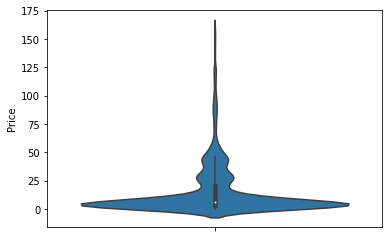

In [10]:
#Biểu đồ phân bố cho giá sản phẩm
sns.violinplot(y = "Price", data=df1)

Có thể nhận tháy dữ liệu phân bố không được đều, nhiều sản phẩm giá thấp và ít sản phẩm giá cao.

<AxesSubplot:xlabel='Year', ylabel='count'>

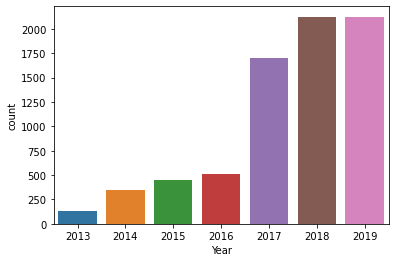

In [11]:
#vẽ biểu đồ tần số cho các sản phẩm theo năm
sns.countplot(x = "Year", data = df1)

Tương tự như đã nhận xét ở phần trước, những năm càng xa thì càng ít sản phẩm

<AxesSubplot:xlabel='Place', ylabel='count'>

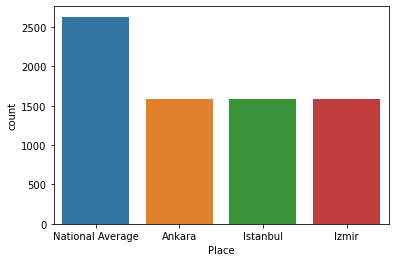

In [12]:
#Thống kê sản phẩm theo địa điểm
sns.countplot(x = "Place", data = df1)

<AxesSubplot:xlabel='Year', ylabel='count'>

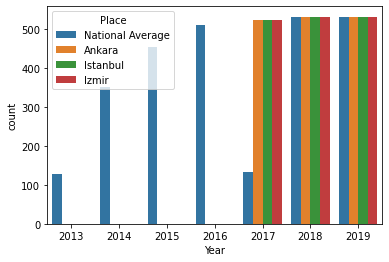

In [14]:
#Hiển thị quan hệ giữa số lượng theo năm được nhóm theo địa điểm
sns.countplot(x = "Year", hue = "Place", data = df1)

Có thể thấy rằng các năm 2013-2016 chỉ có dữ liệu cho sản phẩm ở National Avarage

<AxesSubplot:xlabel='Price'>

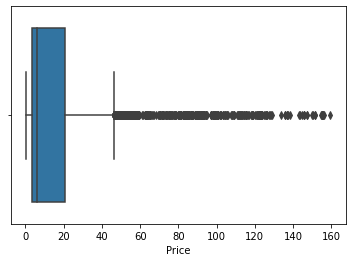

In [16]:
#Vẽ biểu đồ box plot cho thuộc tính giá sản phẩm
sns.boxplot(x=df1["Price"])

Tương tự như trên đã nhận xét, giá sản phẩm phân bố rất không đồng đều, tập trung ở giá thấp

<AxesSubplot:xlabel='Year', ylabel='Price'>

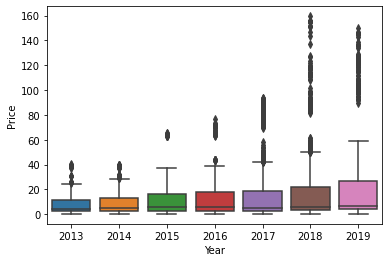

In [17]:
#Vẽ biểu đồ box plot giá sản phẩm phân bố theo năm
sns.boxplot(x = "Year", y = "Price", data=df1)